In [181]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [182]:
#Read CSV File using Pandas
df = pd.read_excel('flight_price.xlsx')

#**Profile of Data (Basic Analysis of Data)**

In [183]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [184]:
df.shape

(10683, 11)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [186]:
#Statistic Data
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [187]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


#**Univariate Analysis**

In [188]:
#Top 5 Airlines
df['Airline'].value_counts().head(5)

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1752
Multiple carriers,1196
SpiceJet,818


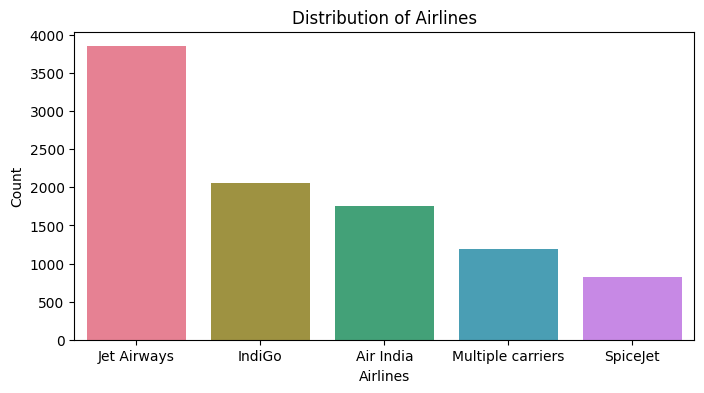

In [189]:
#Create a Countplot for Airlines
plt.figure(figsize = (8,4))
sns.countplot(x = df['Airline'], data = df, palette = 'husl', order = df['Airline'].value_counts().iloc[:5].index)
plt.title("Distribution of Airlines")
plt.xlabel("Airlines")
plt.ylabel("Count")
plt.show()

**Insight**-Jet Airways is most used Airlines by the passengers

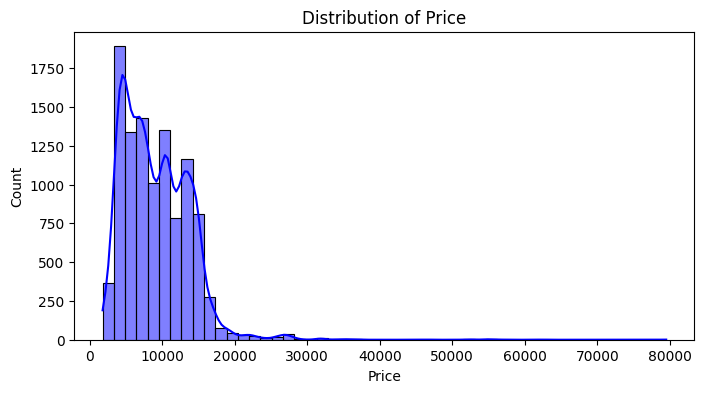

In [190]:
#Check the distribution of price in histplot
plt.figure(figsize = (8,4))
sns.histplot(df['Price'], color = 'blue', bins = 50, kde = True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

**Insight**-It is Right Skewed Histogram. The graph highlights a significant disparity in pricing, where the majority of prices are low to moderate, but there is a substantial tail of high-priced items. This could reflect a market where most products are affordable, but a select few command premium prices.







#**Bivariate Analysis**

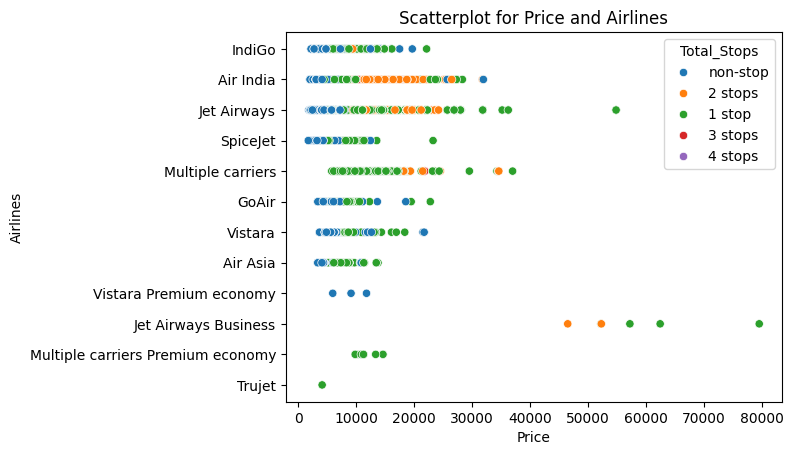

In [191]:
#Bivariate Analysis of Airlines with respect to price (Hue - Total Stops)
sns.scatterplot(data = df, x = 'Price', y = 'Airline', hue = 'Total_Stops')
plt.title("Scatterplot for Price and Airlines")
plt.xlabel("Price")
plt.ylabel("Airlines")
plt.show()

**Insight**-IndiGo, Air India, Jet Airways, and SpiceJet appear to offer a wide range of prices, suggesting that these airlines have a diverse set of routes and services, including both budget and premium options.

#**Multivariate Analysis**

In [192]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

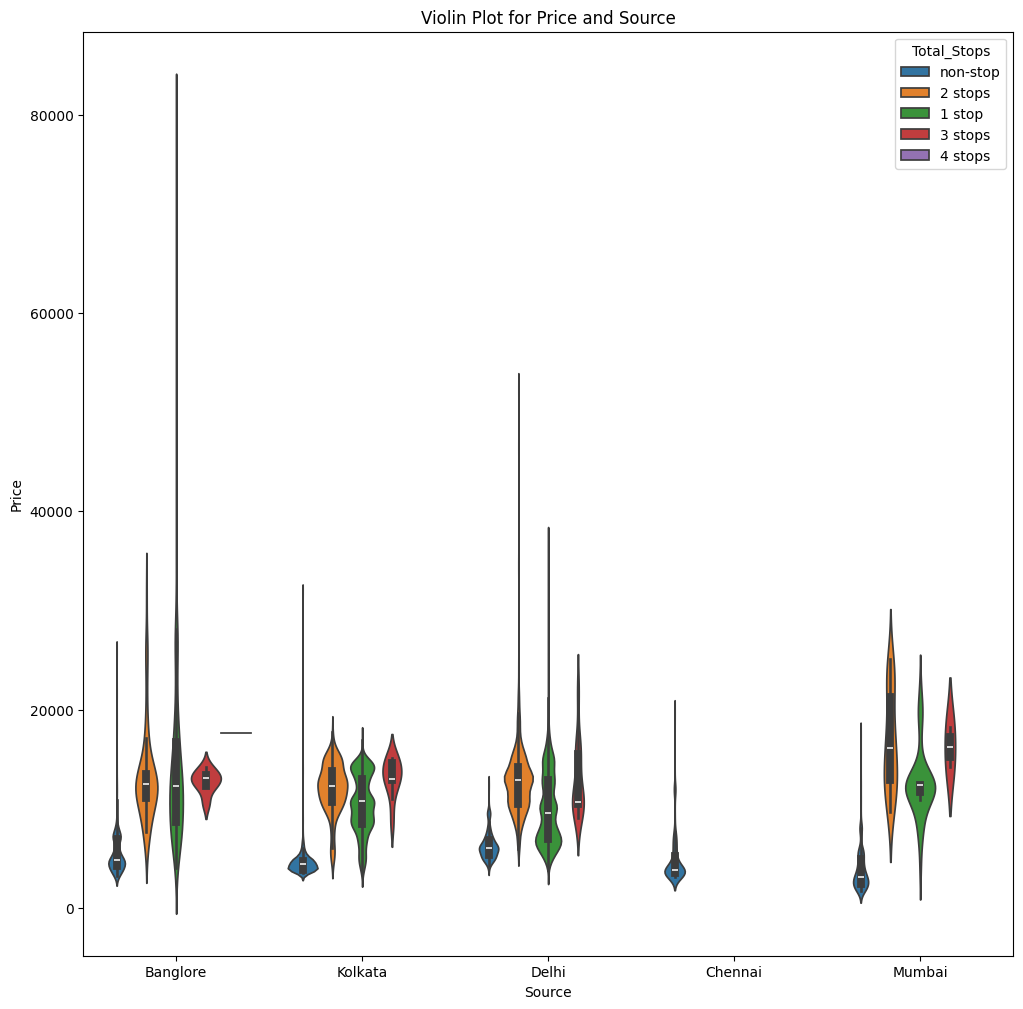

In [193]:
#Create a Violinplot for Price and Source
plt.figure(figsize = (12,12))
sns.violinplot(data = df, x = 'Source', y = 'Price', hue = 'Total_Stops')
plt.title("Violin Plot for Price and Source")
plt.xlabel("Source")
plt.ylabel("Price")
plt.show()

**Insight**-Bangalore and Delhi show extreme high-end outliers, where prices exceed ₹60,000. These are likely last-minute bookings, business class, or multi-stop international flights.

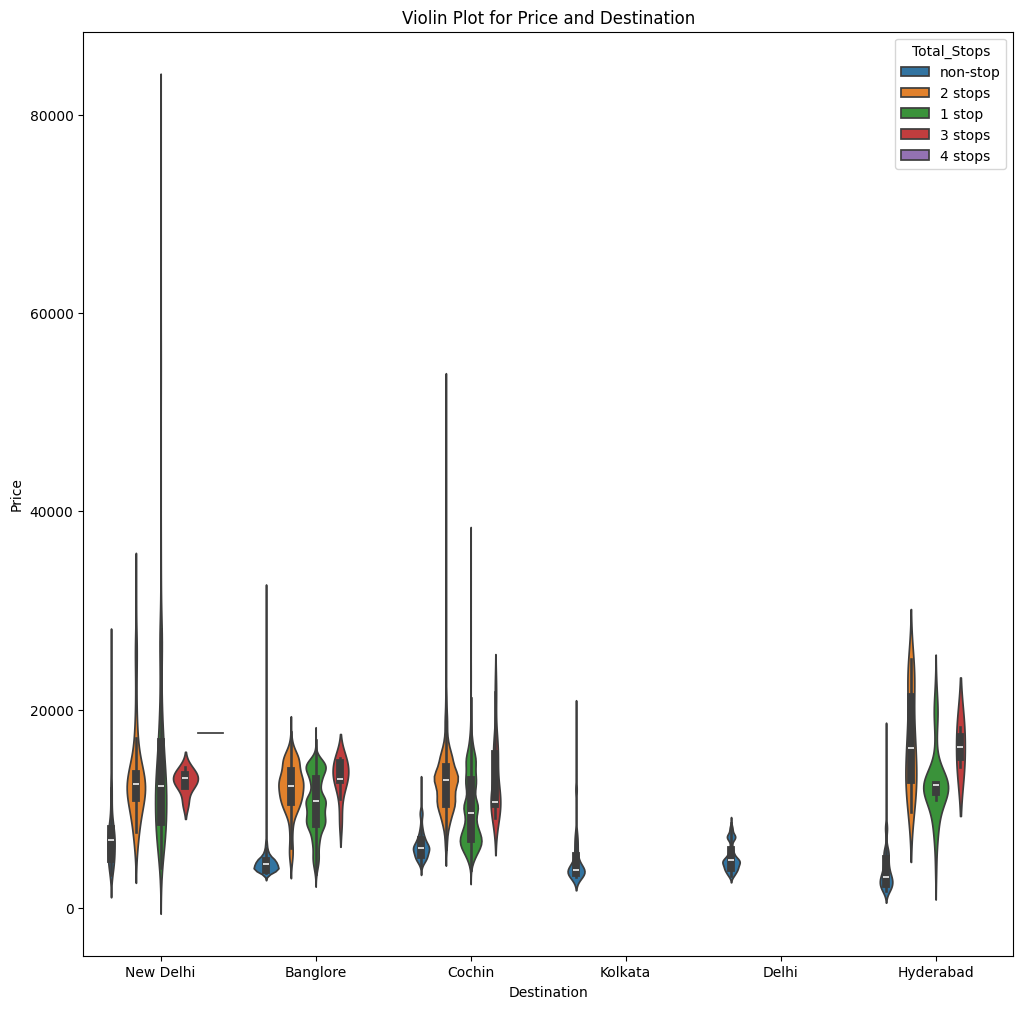

In [194]:
#Create a Violinplot for Price and Destination
plt.figure(figsize = (12,12))
sns.violinplot(data = df, x = 'Destination', y = 'Price', hue = 'Total_Stops')
plt.title("Violin Plot for Price and Destination")
plt.xlabel("Destination")
plt.ylabel("Price")
plt.show()

**Insight**-The plot highlights that flight prices vary widely depending on the destination and the number of stops, with some destinations like New Delhi and Cochin showing higher price variability. Non-stop flights generally offer more stable pricing, while flights with more stops are prone to a wider range of prices, including higher outliers.

#**Feature Engineering**

In [195]:
#Now Analyse Date of Journey Column
df['Date_of_Journey']

,Date_of_Journey
0,24/03/2019
1,1/05/2019
2,9/06/2019
3,12/05/2019
4,01/03/2019
...,...
10678,9/04/2019
10679,27/04/2019
10680,27/04/2019
10681,01/03/2019


In [196]:
#Create a new column for date, month and year using date of journey.
df['date'] = df['Date_of_Journey'].str.split('/').str[0]
df['month'] = df['Date_of_Journey'].str.split('/').str[1]
df['year'] = df['Date_of_Journey'].str.split('/').str[2]

In [197]:
#Change data type to integer.
df['date'] = df['date'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

In [198]:
#Drop date of journey
df.drop('Date_of_Journey', axis = 1, inplace = True)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  date             10683 non-null  int64 
 11  month            10683 non-null  int64 
 12  year             10683 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [200]:
#Now Analyse Arrival Time Column
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x : x.split(' ')[0])
df['Arrival_Time']

,Arrival_Time
0,01:10
1,13:15
2,04:25
3,23:30
4,21:35
...,...
10678,22:25
10679,23:20
10680,11:20
10681,14:10


In [201]:
#Create a new column for hours and minutes using Arrival Time.
df['arrival_hr'] = df['Arrival_Time'].str.split(':').str[0]
df['arrival_min'] = df['Arrival_Time'].str.split(':').str[1]

In [202]:
#Change data type to integer.
df['arrival_hr'] = df['arrival_hr'].astype(int)
df['arrival_min'] = df['arrival_min'].astype(int)

In [203]:
#Drop Arrival Time
df.drop('Arrival_Time', axis = 1, inplace = True)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   date             10683 non-null  int64 
 10  month            10683 non-null  int64 
 11  year             10683 non-null  int64 
 12  arrival_hr       10683 non-null  int64 
 13  arrival_min      10683 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.1+ MB


In [205]:
#Now Analyse Dep Time Column
#Create a new column for hours and minutes using Dep Time.
df['Dep_hr'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_min'] = df['Dep_Time'].str.split(':').str[1]

In [206]:
#Change data type to integer.
df['Dep_hr'] = df['Dep_hr'].astype(int)
df['Dep_min'] = df['Dep_min'].astype(int)

In [207]:
#Drop Dep Time
df.drop('Dep_Time', axis = 1, inplace = True)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   date             10683 non-null  int64 
 9   month            10683 non-null  int64 
 10  year             10683 non-null  int64 
 11  arrival_hr       10683 non-null  int64 
 12  arrival_min      10683 non-null  int64 
 13  Dep_hr           10683 non-null  int64 
 14  Dep_min          10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


In [209]:
#Now Analyse Total Stop Column
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [210]:
#Check null value
df['Total_Stops'].isna().sum()

1

In [211]:
#Check mode value to fill null value.
df['Total_Stops'].mode()[0]

'1 stop'

In [212]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,arrival_hr,arrival_min,Dep_hr,Dep_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [213]:
#Convert to integer and fill null value using mapping
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops': 2, '3 stops':3, '4 stops': 4, np.nan:1})

In [214]:
df['Total_Stops'].isnull().sum()

0

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10683 non-null  int64 
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   date             10683 non-null  int64 
 9   month            10683 non-null  int64 
 10  year             10683 non-null  int64 
 11  arrival_hr       10683 non-null  int64 
 12  arrival_min      10683 non-null  int64 
 13  Dep_hr           10683 non-null  int64 
 14  Dep_min          10683 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.2+ MB


In [216]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,arrival_hr,arrival_min,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,2019,21,35,16,50


In [217]:
#Now Analyse Route Column-Already Arrival and Destination given therefore drop Route.
df.drop('Route', axis = 1, inplace = True)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Duration         10683 non-null  object
 4   Total_Stops      10683 non-null  int64 
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   date             10683 non-null  int64 
 8   month            10683 non-null  int64 
 9   year             10683 non-null  int64 
 10  arrival_hr       10683 non-null  int64 
 11  arrival_min      10683 non-null  int64 
 12  Dep_hr           10683 non-null  int64 
 13  Dep_min          10683 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.1+ MB


In [219]:
#Now Analyse Duration Column
df['Duration_hr'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_hr'].head()

,Duration_hr
0,2
1,7
2,19
3,5
4,4


In [220]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'date', 'month', 'year', 'arrival_hr',
       'arrival_min', 'Dep_hr', 'Dep_min', 'Duration_hr'],
      dtype='object')

In [221]:
#Now Analyse Airline, Source, Destination Column

In [222]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [223]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [224]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

#**Encoding**

In [225]:
from sklearn.preprocessing import OneHotEncoder

In [226]:
encoder = OneHotEncoder()

In [227]:
a = encoder.fit_transform(df[['Airline', 'Source', 'Destination']]).toarray()

In [228]:
a

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [229]:
b = pd.DataFrame(a, columns = encoder.get_feature_names_out())
b

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [230]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'date', 'month', 'year', 'arrival_hr',
       'arrival_min', 'Dep_hr', 'Dep_min', 'Duration_hr'],
      dtype='object')

In [231]:
#Drop Airline, Source, Destination
df.drop('Airline', axis = 1, inplace = True)
df.drop('Source', axis = 1, inplace = True)
df.drop('Destination', axis = 1, inplace = True)

In [232]:
df.columns

Index(['Duration', 'Total_Stops', 'Additional_Info', 'Price', 'date', 'month',
       'year', 'arrival_hr', 'arrival_min', 'Dep_hr', 'Dep_min',
       'Duration_hr'],
      dtype='object')

In [233]:
df

,Duration,Total_Stops,Additional_Info,Price,date,month,year,arrival_hr,arrival_min,Dep_hr,Dep_min,Duration_hr
0,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,2
1,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,7
2,19h,2,No info,13882,9,6,2019,4,25,9,25,19
3,5h 25m,1,No info,6218,12,5,2019,23,30,18,5,5
4,4h 45m,1,No info,13302,1,3,2019,21,35,16,50,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2h 30m,0,No info,4107,9,4,2019,22,25,19,55,2
10679,2h 35m,0,No info,4145,27,4,2019,23,20,20,45,2
10680,3h,0,No info,7229,27,4,2019,11,20,8,20,3
10681,2h 40m,0,No info,12648,1,3,2019,14,10,11,30,2


In [234]:
#Concat the df and b to get the full dataframe and now use this for training models
df = pd.concat([df, b], axis = 1)

In [235]:
df

,Duration,Total_Stops,Additional_Info,Price,date,month,year,arrival_hr,arrival_min,Dep_hr,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2h 50m,0,No info,3897,24,3,2019,1,10,22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,7h 25m,2,No info,7662,1,5,2019,13,15,5,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,19h,2,No info,13882,9,6,2019,4,25,9,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5h 25m,1,No info,6218,12,5,2019,23,30,18,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4h 45m,1,No info,13302,1,3,2019,21,35,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2h 30m,0,No info,4107,9,4,2019,22,25,19,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,2h 35m,0,No info,4145,27,4,2019,23,20,20,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,3h,0,No info,7229,27,4,2019,11,20,8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,2h 40m,0,No info,12648,1,3,2019,14,10,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


divide data, train test split and do model training